# Analisis factorial


In [531]:
import yfinance as yf
import pandas as pd
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer, ConfirmatoryFactorAnalyzer, ModelSpecificationParser
from sklearn.decomposition import PCA
import numpy as np
import statsmodels.api as sm
import joblib
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense
import matplotlib.pyplot as plt

In [532]:
#MC DONALS DATA
# df = yf.download("MCD", start="2019-01-01", end="2025-01-01", interval="1mo")
# df.to_csv("MCD_2019_2024_monthly.csv")

MCD_DATA = pd.read_csv('MCD_2019_2024_monthly.csv')
MCD_DATA.drop(MCD_DATA.index[[1]], inplace=True)

In [533]:
#TYSON FOODS DATA -- PRODUCTOR DE CARNES
# df = yf.download("TSN", start="2019-01-01", end="2025-01-01", interval="1mo")
# df.to_csv("TSN_2019_2024_monthly.csv")

TSN_DATA = pd.read_csv("TSN_2019_2024_monthly.csv")
TSN_DATA.drop(TSN_DATA.index[[1]], inplace=True)

In [534]:
#HORMEL FOODS DATA -- PROVEEDOR DE CARNES
# df = yf.download("HRL", start="2019-01-01", end="2025-01-01", interval="1mo")
# df.to_csv("HRL_2019_2024_monthly.csv")

HRL_DATA = pd.read_csv("HRL_2019_2024_monthly.csv")
HRL_DATA.drop(HRL_DATA.index[[1]], inplace=True)

In [535]:
#BUNGE LIMITED DATA -- PROVEEDOR DE GRANOS Y ACEITES
# df = yf.download("BG", start="2019-01-01", end="2025-01-01", interval="1mo")
# df.to_csv("BG_2019_2024_monthly.csv")

BG_DATA = pd.read_csv("BG_2019_2024_monthly.csv")
BG_DATA.drop(BG_DATA.index[[1]], inplace=True)

In [536]:
#ARCHER DANIELS MIDLAND DATA -- PROVEEDOR DE GRANOS Y ACEITES
# df = yf.download("ADM", start="2019-01-01", end="2025-01-01", interval="1mo")
# df.to_csv("ADM_2019_2024_monthly.csv")

ADM_DATA = pd.read_csv("ADM_2019_2024_monthly.csv")
ADM_DATA.drop(ADM_DATA.index[[1]], inplace=True)

In [537]:
#KRAFT HEINZ DATA -- PROVEEDOR DE SALAS Y QUESOS
# df = yf.download("KHC", start="2019-01-01", end="2025-01-01", interval="1mo")
# df.to_csv("KHC_2019_2024_monthly.csv")

KHC_DATA = pd.read_csv("KHC_2019_2024_monthly.csv")
KHC_DATA.drop(KHC_DATA.index[[1]], inplace=True)

In [538]:
#YUM! BRANDS DATA -- COMPETENCIA MAS IMPORTANTE
# df = yf.download("YUM", start="2019-01-01", end="2025-01-01", interval="1mo")
# df.to_csv("YUM_2019_2024_monthly.csv")

YUM_DATA = pd.read_csv("YUM_2019_2024_monthly.csv")
YUM_DATA.drop(YUM_DATA.index[[1]], inplace=True)

In [539]:
#INTERNATIONAL PAPER DATA -- PROVEEDORES DE PAPEL Y CARTON
# df = yf.download("IP", start="2019-01-01", end="2025-01-01", interval="1mo")
# df.to_csv("IP_2019_2024_monthly.csv")

IP_DATA = pd.read_csv("IP_2019_2024_monthly.csv")
IP_DATA.drop(IP_DATA.index[[1]], inplace=True)

In [540]:
#JBS DATA -- PROCESADORES DE CARNE
# df = yf.download("JBSAY", start="2019-01-01", end="2025-01-01", interval="1mo")
# df.to_csv("JBSAY_2019_2024_monthly.csv")

JBSAY_DATA = pd.read_csv("JBSAY_2019_2024_monthly.csv")
JBSAY_DATA.drop(JBSAY_DATA.index[[1]], inplace=True)

In [541]:
#SYSCO CORPORATION DATA -- DISTRIBUCION MAYORISTA DE ALIMENTOS
# df = yf.download("SYY", start="2019-01-01", end="2025-01-01", interval="1mo")
# df.to_csv("SYY_2019_2024_monthly.csv")

SYY_DATA = pd.read_csv("SYY_2019_2024_monthly.csv")
SYY_DATA.drop(SYY_DATA.index[[1]], inplace=True)

In [542]:
#EXXON MOBIL -- PRECIOS DE TRANSPORTE
# df = yf.download("XOM", start="2019-01-01", end="2025-01-01", interval="1mo")
# df.to_csv("XOM_2019_2024_monthly.csv")

XOM_DATA = pd.read_csv("XOM_2019_2024_monthly.csv")
XOM_DATA.drop(XOM_DATA.index[[1]], inplace=True)

In [543]:
MCD_DATA.head()
# TSN_DATA.head()
# HRL_DATA.head()
# BG_DATA.head()
# ADM_DATA.head()
# KHC_DATA.head()
# YUM_DATA.head()
# IP_DATA.head()
# JBSAY_DATA.head()
# SYY_DATA.head()
# XOM_DATA.head()


,Price,Close,High,Low,Open,Volume
0,Ticker,MCD,MCD,MCD,MCD,MCD
2,2019-01-01,153.72018432617188,162.86876178771573,149.75637322646475,150.82256560970754,80003700
3,2019-02-01,158.07090759277344,158.81896749532578,149.10290040560773,154.38224818342732,76828400
4,2019-03-01,164.32102966308594,164.85752648592313,154.25756504269074,159.7262729786164,63643000
5,2019-04-01,170.95790100097656,173.06058071904522,161.55204946053382,164.84020313489057,53512800


In [544]:
#MCD_DATA.head()
TSN_DATA.head()
# HRL_DATA.head()
# BG_DATA.head()
# ADM_DATA.head()
# KHC_DATA.head()
# YUM_DATA.head()
# IP_DATA.head()
# JBSAY_DATA.head()
# SYY_DATA.head()
# XOM_DATA.head()

,Price,Close,High,Low,Open,Volume
0,Ticker,TSN,TSN,TSN,TSN,TSN
2,2019-01-01,51.74124526977539,52.276041195950036,44.1371550416167,44.32099124085224,57673700
3,2019-02-01,51.523983001708984,53.420828043699295,48.6327579862133,51.93343545410291,59262300
4,2019-03-01,58.37177276611328,58.46425340277398,51.73842623762424,51.957014209356906,59722400
5,2019-04-01,63.06302261352539,63.39090609077144,57.699172716967766,58.43060854311116,48377000


In [545]:
close_data = pd.concat([
    MCD_DATA['Close'].rename('MCD'),
    TSN_DATA['Close'].rename('TSN'),
    HRL_DATA['Close'].rename('HRL'),
    BG_DATA['Close'].rename('BG'),
    ADM_DATA['Close'].rename('ADM'),
    KHC_DATA['Close'].rename('KHC'),
    YUM_DATA['Close'].rename('YUM'),
    IP_DATA['Close'].rename('IP'),
    JBSAY_DATA['Close'].rename('JBSAY'),
    SYY_DATA['Close'].rename('SYY'),
    XOM_DATA['Close'].rename('XOM'),
], axis=1)

In [546]:
close_data.head()

,MCD,TSN,HRL,BG,ADM,KHC,YUM,IP,JBSAY,SYY,XOM
0,MCD,TSN,HRL,BG,ADM,KHC,YUM,IP,JBSAY,SYY,XOM
2,153.72018432617188,51.74124526977539,35.86342239379883,45.138065338134766,37.123695373535156,35.27021789550781,83.41633605957031,33.50801467895508,6.361457824707031,53.90599822998047,53.88784408569336
3,158.07090759277344,51.523983001708984,36.92404556274414,43.50697708129883,35.139366149902344,24.35744857788086,83.87789916992188,32.37059020996094,5.515315055847168,57.39047622680664,58.116207122802734
4,164.32102966308594,58.37177276611328,38.11622619628906,43.91375732421875,35.95819854736328,23.961145401000977,88.98843383789062,33.03677749633789,6.299920082092285,56.71929931640625,60.077491760253906
5,170.95790100097656,63.06302261352539,34.01166534423828,43.36762619018555,37.18376922607422,24.694740295410156,93.07186126708984,33.42232894897461,7.638364791870117,59.786346435546875,59.69084548950195


In [547]:

close_data_sin_primera = close_data.iloc[1:]

X = close_data_sin_primera.drop(columns='MCD')
y = close_data_sin_primera['MCD']

scaler_x = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_x.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

In [548]:
data_escalada = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

fa = FactorAnalyzer(n_factors=3, rotation='varimax')
fa.fit(data_escalada)

cargas = pd.DataFrame(fa.loadings_, index=data_escalada.columns)
cargas.head()

,0,1,2
TSN,-0.068690,0.810365,0.440488
HRL,-0.046330,-0.013532,0.992326
BG,0.934631,0.197916,-0.150297
ADM,0.926202,0.063680,0.227864
KHC,0.854501,0.099367,0.013740


In [549]:
pca = PCA(n_components=10)
dfEscaladoACP = pca.fit_transform(data_escalada)

explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_cumsum = np.cumsum(explained_variance_ratio)

for i, var in enumerate(explained_variance_ratio):
    print(f"Componente Principal {i+1}: {var:.2%} de la varianza explicada")

print(f"Varianza acumulada de las componentes: {explained_variance_cumsum[-1]:.1%}")

Componente Principal 1: 52.39% de la varianza explicada
Componente Principal 2: 20.54% de la varianza explicada
Componente Principal 3: 14.06% de la varianza explicada
Componente Principal 4: 6.13% de la varianza explicada
Componente Principal 5: 2.26% de la varianza explicada
Componente Principal 6: 1.48% de la varianza explicada
Componente Principal 7: 1.22% de la varianza explicada
Componente Principal 8: 0.96% de la varianza explicada
Componente Principal 9: 0.67% de la varianza explicada
Componente Principal 10: 0.31% de la varianza explicada
Varianza acumulada de las componentes: 100.0%


In [550]:
print(pca.explained_variance_ratio_)

[0.52389084 0.20535187 0.14057145 0.06127641 0.02263948 0.01478785
 0.01215241 0.00957058 0.00670482 0.00305428]


In [551]:

model_dict = {
    "Factor1": ["MCD", "TSN", "BG", "HRL"],
    "Factor2": ["YUM", "ADM", "IP", "JBSAY", "KHC"],
    "Factor3": ["XOM", "SYY"]
}

variables_usadas = sum(model_dict.values(), [])
X_para_cfa = close_data_sin_primera[variables_usadas]


scaler_cfa = StandardScaler()
X_escalado_cfa = scaler_cfa.fit_transform(X_para_cfa)
data_escalada = pd.DataFrame(X_escalado_cfa, columns=variables_usadas, index=close_data_sin_primera.index)

joblib.dump(scaler_cfa, 'scaler_cfa.save')


model_spec = ModelSpecificationParser.parse_model_specification_from_dict(data_escalada, model_dict)
cfa = ConfirmatoryFactorAnalyzer(model_spec, disp=False)
cfa.fit(data_escalada)


cargas = pd.DataFrame(cfa.loadings_, index=variables_usadas)
print(cargas.round(3))


           0      1      2
MCD    0.829  0.000  0.000
TSN    0.624  0.000  0.000
BG     0.998  0.000  0.000
HRL    0.399  0.000  0.000
YUM    0.000  1.041  0.000
ADM    0.000  0.854  0.000
IP     0.000  0.698  0.000
JBSAY  0.000  0.560  0.000
KHC    0.000  0.976  0.000
XOM    0.000  0.000  0.742
SYY    0.000  0.000  0.760


c:\Users\matia\Documents\codigoCosas\ciencia_de_datos\proyecto\.venv\lib\site-packages\factor_analyzer\confirmatory_factor_analyzer.py:753: UserWarning: The optimization routine failed to converge: ABNORMAL_TERMINATION_IN_LNSRCH
  warnings.warn(


In [552]:
loadings_df = pd.DataFrame(cfa.loadings_, index=data_escalada.columns)
print("Cargas factoriales:\n", loadings_df.round(3))

Cargas factoriales:
            0      1      2
MCD    0.829  0.000  0.000
TSN    0.624  0.000  0.000
BG     0.998  0.000  0.000
HRL    0.399  0.000  0.000
YUM    0.000  1.041  0.000
ADM    0.000  0.854  0.000
IP     0.000  0.698  0.000
JBSAY  0.000  0.560  0.000
KHC    0.000  0.976  0.000
XOM    0.000  0.000  0.742
SYY    0.000  0.000  0.760


In [553]:
scores = cfa.transform(data_escalada)
df_scores = pd.DataFrame(scores, columns=model_dict.keys())

In [554]:
df_reg = close_data_sin_primera.copy()
df_reg = pd.concat([df_reg, df_scores], axis=1)

In [555]:
af1 = cfa.loadings_[:,0]*data_escalada
af2 = cfa.loadings_[:,1]*data_escalada
af3 = cfa.loadings_[:,2]*data_escalada

af1.head()

,MCD,TSN,BG,HRL,YUM,ADM,IP,JBSAY,KHC,XOM,SYY
2,-1.392525,-0.591652,-1.205355,-0.199916,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0
3,-1.306763,-0.604735,-1.274239,-0.113357,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
4,-1.183560,-0.192364,-1.257060,-0.016062,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
5,-1.052733,0.090141,-1.280124,-0.351039,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
6,-1.040793,0.134695,-1.284318,-0.368374,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0


In [556]:
af2.head()

,MCD,TSN,BG,HRL,YUM,ADM,IP,JBSAY,KHC,XOM,SYY
2,-0.0,-0.0,-0.0,-0.0,-1.503853,-0.943008,-0.253432,-0.651316,1.124841,-0.0,-0.0
3,-0.0,-0.0,-0.0,-0.0,-1.477768,-1.044129,-0.361660,-0.874976,-1.130249,-0.0,-0.0
4,-0.0,-0.0,-0.0,-0.0,-1.188950,-1.002401,-0.298271,-0.667582,-1.212144,-0.0,-0.0
5,-0.0,0.0,-0.0,-0.0,-0.958178,-0.939946,-0.261585,-0.313792,-1.060548,-0.0,-0.0
6,-0.0,0.0,-0.0,-0.0,-1.060967,-1.206758,-0.624375,-0.092165,-1.918740,-0.0,-0.0


In [557]:
af3.head()

,MCD,TSN,BG,HRL,YUM,ADM,IP,JBSAY,KHC,XOM,SYY
2,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.476330,-1.140712
3,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.367236,-0.854141
4,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.316634,-0.909340
5,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.326610,-0.657100
6,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.509045,-0.737023


In [558]:
close_data_sin_primera['RegAF1']=af1.sum(axis=1)
close_data_sin_primera['RegAF2']=af2.sum(axis=1)
close_data_sin_primera['RegAF3']=af3.sum(axis=1)

close_data_sin_primera.head()

C:\Users\matia\AppData\Local\Temp\ipykernel_11272\1300056377.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  close_data_sin_primera['RegAF1']=af1.sum(axis=1)
C:\Users\matia\AppData\Local\Temp\ipykernel_11272\1300056377.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  close_data_sin_primera['RegAF2']=af2.sum(axis=1)
C:\Users\matia\AppData\Local\Temp\ipykernel_11272\1300056377.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

,MCD,TSN,HRL,BG,ADM,KHC,YUM,IP,JBSAY,SYY,XOM,RegAF1,RegAF2,RegAF3
2,153.72018432617188,51.74124526977539,35.86342239379883,45.138065338134766,37.123695373535156,35.27021789550781,83.41633605957031,33.50801467895508,6.361457824707031,53.90599822998047,53.88784408569336,-3.389448,-2.226767,-1.617042
3,158.07090759277344,51.523983001708984,36.92404556274414,43.50697708129883,35.139366149902344,24.35744857788086,83.87789916992188,32.37059020996094,5.515315055847168,57.39047622680664,58.116207122802734,-3.299095,-4.888782,-1.221377
4,164.32102966308594,58.37177276611328,38.11622619628906,43.91375732421875,35.95819854736328,23.961145401000977,88.98843383789062,33.03677749633789,6.299920082092285,56.71929931640625,60.077491760253906,-2.649046,-4.369348,-1.225974
5,170.95790100097656,63.06302261352539,34.01166534423828,43.36762619018555,37.18376922607422,24.694740295410156,93.07186126708984,33.42232894897461,7.638364791870117,59.786346435546875,59.69084548950195,-2.593755,-3.534050,-0.983709
6,171.5635986328125,63.8028678894043,33.79925537109375,43.268333435058594,31.948028564453125,20.541805267333984,91.2530517578125,29.609575271606445,8.47681713104248,58.814544677734375,52.619834899902344,-2.558790,-4.903005,-1.246068


In [559]:
#'TSN', 'BG', 'HRL', 'YUM' , 'RegAF1' , 'RegAF2' , 'RegAF3'

x = close_data_sin_primera[['RegAF1' , 'RegAF2' , 'RegAF3']].astype(float)
y = close_data_sin_primera['MCD'].astype(float)

x = sm.add_constant(x)

modelo = sm.OLS(y, x).fit()

print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                    MCD   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     83.64
Date:                Wed, 02 Jul 2025   Prob (F-statistic):           8.97e-23
Time:                        21:36:37   Log-Likelihood:                -315.74
No. Observations:                  72   AIC:                             639.5
Df Residuals:                      68   BIC:                             648.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        224.3632      2.355     95.263      0.0

## Resultados
Como resultado del analisis factorial, las variables que seran utilizadas para la prediccion seran 'HRL', 'YUM', 'TSN', 'BG' pues representan la mayor cantidad de valores y dan un modelo con mejores resultados.

# Red convolucional

In [560]:

from tensorflow.keras.models import load_model

In [561]:
close_data_sin_primera = close_data.iloc[1:]

columnas_modelo = ['HRL', 'YUM', 'TSN', 'BG']
X = close_data_sin_primera[columnas_modelo]
y = close_data_sin_primera['MCD']

scaler_x = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_x.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

joblib.dump(scaler_x, 'scaler_x.save')
joblib.dump(scaler_y, 'scaler_y.save')
joblib.dump(columnas_modelo, 'scaler_X_columns.pkl')

X_scaled = pd.DataFrame(X_scaled, columns=columnas_modelo, index=X.index)


In [562]:
class_names = ['HRL', 'YUM', 'TSN', 'BG']

x_all = data_escalada[class_names]  
y_all = data_escalada['MCD']       

print(x_all.head())
print(y_all.head())


        HRL       YUM       TSN        BG
2 -0.500438 -1.444294 -0.947721 -1.207815
3 -0.283761 -1.419242 -0.968679 -1.276840
4 -0.040208 -1.141862 -0.308133 -1.259625
5 -0.878738 -0.920230  0.144390 -1.282737
6 -0.922132 -1.018948  0.215757 -1.286938
2   -1.679596
3   -1.576154
4   -1.427552
5   -1.269755
6   -1.255354
Name: MCD, dtype: float64


In [563]:
#Modelo elaborado, comentado para no trabajar siempre con el mismo---------------------------------------

X = x_all.to_numpy().reshape(-1, x_all.shape[1], 1)  
y = y_all.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential([
    Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(X.shape[1], 1)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1)  
])

model.compile(optimizer='adam', loss='mse')

model.fit(X_train, y_train, epochs=50, batch_size=8, verbose=1, validation_data=(X_test, y_test))
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=8,
    verbose=1,
    validation_data=(X_test, y_test)
)


mse = model.evaluate(X_test, y_test, verbose=0)
print("mse: ",mse)
model.save('modelo_cnn_mcd.h5')

Epoch 1/50
8/8 [==============================] - 1s 9ms/step - loss: 1.1060 - val_loss: 0.9123
Epoch 2/50
8/8 [==============================] - 0s 2ms/step - loss: 0.6980 - val_loss: 0.5810
Epoch 3/50
8/8 [==============================] - 0s 2ms/step - loss: 0.4092 - val_loss: 0.3490
Epoch 4/50
8/8 [==============================] - 0s 3ms/step - loss: 0.2428 - val_loss: 0.2071
Epoch 5/50
8/8 [==============================] - 0s 3ms/step - loss: 0.1674 - val_loss: 0.1226
Epoch 6/50
8/8 [==============================] - 0s 3ms/step - loss: 0.1195 - val_loss: 0.0725
Epoch 7/50
8/8 [==============================] - 0s 3ms/step - loss: 0.0916 - val_loss: 0.0548
Epoch 8/50
8/8 [==============================] - 0s 3ms/step - loss: 0.0831 - val_loss: 0.0506
Epoch 9/50
8/8 [==============================] - 0s 3ms/step - loss: 0.0808 - val_loss: 0.0493
Epoch 10/50
8/8 [==============================] - 0s 2ms/step - loss: 0.0784 - val_loss: 0.0489
Epoch 11/50
8/8 [======================

c:\Users\matia\Documents\codigoCosas\ciencia_de_datos\proyecto\.venv\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [564]:
##Data extraida de Yahoo Finance, comentada para descargar solo una vez---------------------------------------
# #MC DONALS DATA
# df = yf.download("MCD", start="2025-03-01", end="2025-04-01", interval="1mo")
# df.to_csv("MCD_PREDICT.csv")

# #HORMEL FOODS DATA 
# df = yf.download("HRL", start="2025-03-01", end="2025-04-01", interval="1mo")
# df.to_csv("HRL_PREDICT.csv")

# #YUM! BRANDS DATA 
# df = yf.download("YUM", start="2025-03-01", end="2025-04-01", interval="1mo")
# df.to_csv("YUM_PREDICT.csv")

# #TYSON FOODS DATA 
# df = yf.download("TSN", start="2025-03-01", end="2025-04-01", interval="1mo")
# df.to_csv("TSN_PREDICT.csv")

# #BUNGE LIMITED DATA 
# df = yf.download("BG", start="2025-03-01", end="2025-04-01", interval="1mo")
# df.to_csv("BG_PREDICT.csv")

# #ADM DATA
# df = yf.download("ADM", start="2025-03-01", end="2025-04-01", interval="1mo")
# df.to_csv("ADM_PREDICT.csv")

# #KRAFT HEINZ DATA
# df = yf.download("KHC", start="2025-03-01", end="2025-04-01", interval="1mo")
# df.to_csv("KHC_PREDICT.csv")

# #INTER PUBLIC DATA
# df = yf.download("IP", start="2025-03-01", end="2025-04-01", interval="1mo")
# df.to_csv("IP_PREDICT.csv")

#JBS DATA
# df = yf.download("JBSAY", start="2025-02-01", end="2025-03-01", interval="1mo")
# df.to_csv("JBSAY_PREDICT.csv")

# #SYSCO DATA
# df = yf.download("SYY", start="2025-03-01", end="2025-04-01", interval="1mo")
# df.to_csv("SYY_PREDICT.csv")

# #EXXON MOBIL DATA
# df = yf.download("XOM", start="2025-03-01", end="2025-04-01", interval="1mo")
# df.to_csv("XOM_PREDICT.csv")

def cargar_y_limpiar(path):
    df = pd.read_csv(path)
    df = df.drop(df.index[0:2]).reset_index(drop=True)  
    df = df[['Close']].astype(float)                    
    return df

BG_PREDICT = cargar_y_limpiar("BG_PREDICT.csv")
TSN_PREDICT = cargar_y_limpiar("TSN_PREDICT.csv")
HRL_PREDICT = cargar_y_limpiar("HRL_PREDICT.csv")
YUM_PREDICT = cargar_y_limpiar("YUM_PREDICT.csv")

MCD_PREDICT = cargar_y_limpiar("MCD_PREDICT.csv")


X_pred = pd.DataFrame({
    'TSN': TSN_PREDICT['Close'].values,
    'HRL': HRL_PREDICT['Close'].values,
    'BG': BG_PREDICT['Close'].values,    
    'YUM': YUM_PREDICT['Close'].values,
})

print(X_pred.head())

         TSN        HRL         BG         YUM
0  63.241489  30.643972  75.763954  156.591873


In [565]:
model = load_model("modelo_cnn_mcd.h5")
scaler_X = joblib.load("scaler_x.save")
scaler_y = joblib.load("scaler_y.save")

In [566]:

columnas_esperadas = joblib.load('scaler_X_columns.pkl') 

X_pred = X_pred.reindex(columns=columnas_esperadas, fill_value=0)

X_pred_scaled = scaler_X.transform(X_pred)

X_pred_scaled = X_pred_scaled.reshape((X_pred_scaled.shape[0], X_pred_scaled.shape[1], 1))


In [567]:
columnas_esperadas = ['HRL', 'YUM', 'TSN', 'BG']

X_pred = X_pred.reindex(columns=columnas_esperadas)
X_pred_scaled = scaler_X.transform(X_pred)
X_pred_scaled = X_pred_scaled.reshape((X_pred_scaled.shape[0], X_pred_scaled.shape[1], 1))

# Hacer predicción
pred_scaled = model.predict(X_pred_scaled)
pred_original = scaler_y.inverse_transform(pred_scaled)

# Valor predicho y esperado
valor_predicho = pred_original[0][0]
valor_real = MCD_PREDICT['Close'].values[0]

# Cálculo del error porcentual
error_porcentual = abs(valor_predicho - valor_real) / valor_real * 100

# Mostrar resultados
print(f"Predicción desescalada: {valor_predicho:.2f}")
print(f"Valor esperado: {valor_real:.2f}")
print(f"Error porcentual: {error_porcentual:.2f}%")


1/1 [==============================] - 0s 28ms/step
Predicción desescalada: 326.89
Valor esperado: 308.83
Error porcentual: 5.85%


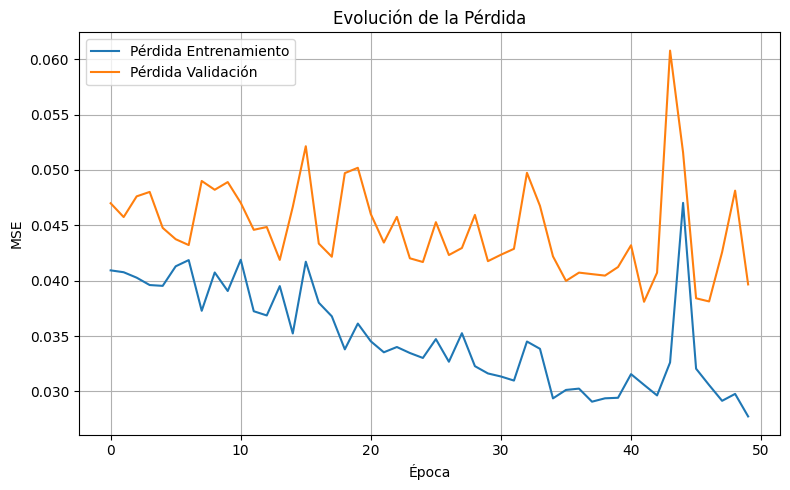

In [568]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Pérdida Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida Validación')
plt.xlabel('Época')
plt.ylabel('MSE')
plt.title('Evolución de la Pérdida')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 10ms/step


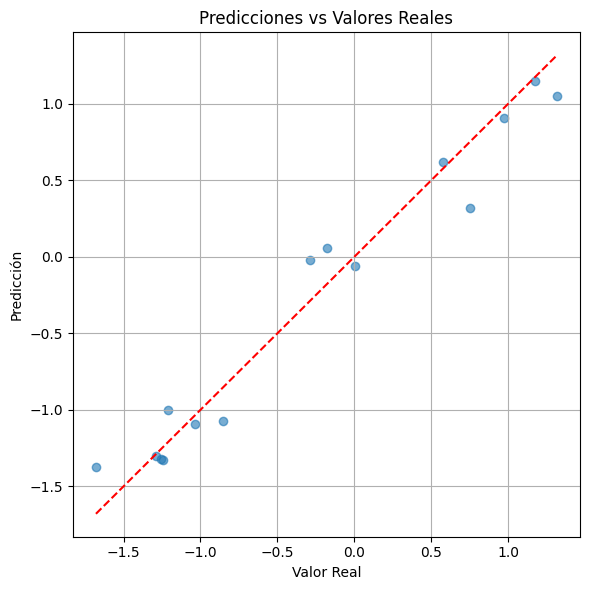

In [569]:

# Obtener predicciones
y_pred = model.predict(X_test).flatten()

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Línea ideal
plt.xlabel('Valor Real')
plt.ylabel('Predicción')
plt.title('Predicciones vs Valores Reales')
plt.grid(True)
plt.tight_layout()
plt.show()

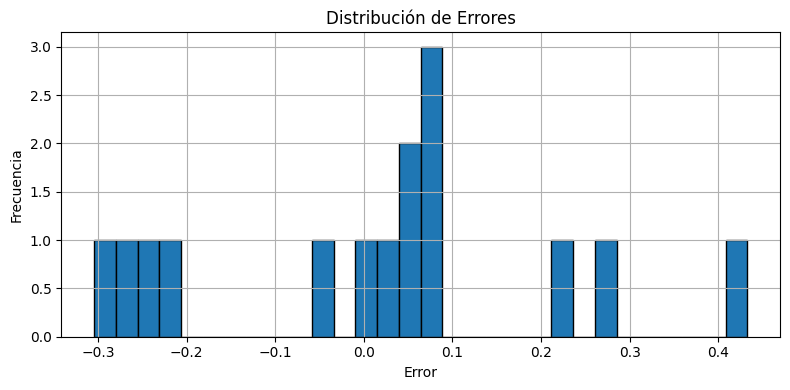

In [570]:
errors = y_test - y_pred

plt.figure(figsize=(8,4))
plt.hist(errors, bins=30, edgecolor='k')
plt.xlabel('Error')
plt.ylabel('Frecuencia')
plt.title('Distribución de Errores')
plt.grid(True)
plt.tight_layout()
plt.show()

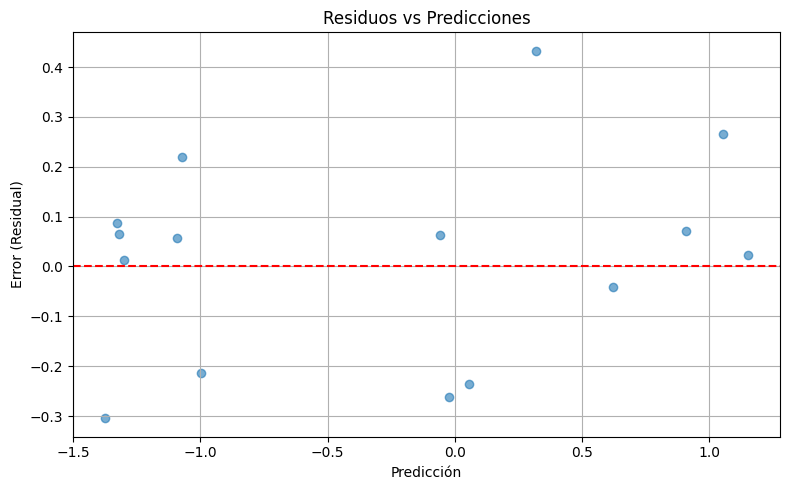

In [571]:
plt.figure(figsize=(8,5))
plt.scatter(y_pred, errors, alpha=0.6)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicción')
plt.ylabel('Error (Residual)')
plt.title('Residuos vs Predicciones')
plt.grid(True)
plt.tight_layout()
plt.show()


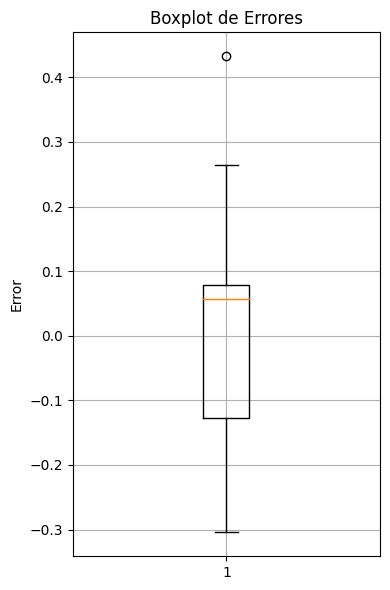

In [572]:
plt.figure(figsize=(4,6))
plt.boxplot(errors, vert=True)
plt.ylabel('Error')
plt.title('Boxplot de Errores')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
n_models = 5
predicciones = []

for i in range(n_models):
    # Aquí deberías re-entrenar el modelo
    model.fit(...)  # entrenar otra vez
    pred_scaled = model.predict(X_pred_scaled)
    pred_original = scaler_y.inverse_transform(pred_scaled)
    predicciones.append(pred_original[0][0])

media_predicciones = np.mean(predicciones)
print(f"Predicción promedio: {media_predicciones:.2f}")

pred_scaled = model.predict(X_pred_scaled)
pred_original = scaler_y.inverse_transform(pred_scaled)

media = np.mean(pred_original)
print(f"Media de predicciones: {media:.2f}")